# Monte Carlo Methods

### Random numbers


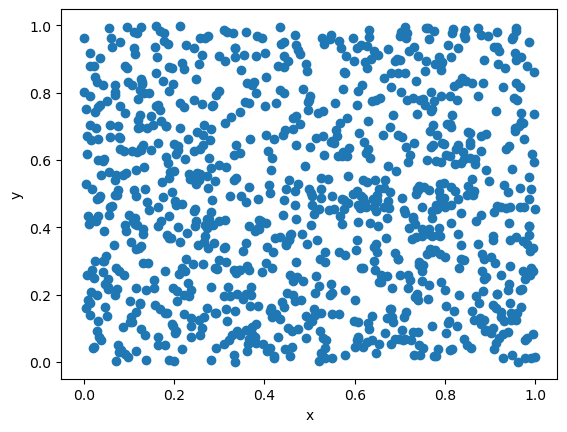

In [1]:
# Use Mersenne Twister
import numpy as np
import matplotlib.pyplot as plt

#np.random.rand() # Random number \eta uniformly distributed over (0,1)

resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Creating a random graph of uniformly distributed between 0 adn 1

Pseudo-random number generators are iterative constructs that generate a pre-determined sequence of numbers from an initial state. The initial state can be changes by modifying the seed value.

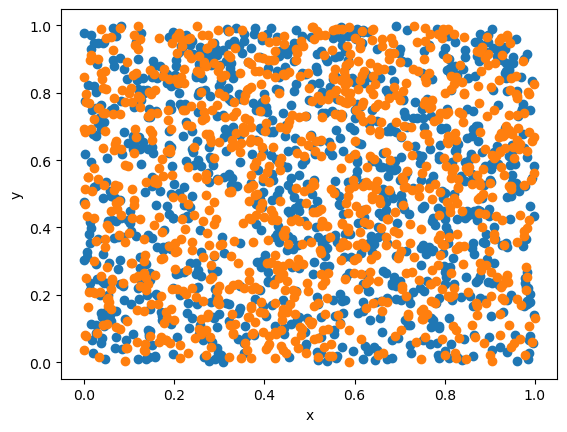

In [2]:
N = 1000
np.random.seed(1)
resultsx = []
resultsy = []

N = 1000
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")


#plt.show()

#repeat the same code below to see the effect of the seed value

np.random.seed(5)
resultsx = []
resultsy = []
N = 1000
for i in range(N):
    resultsx.append(np.random.rand())
    resultsy.append(np.random.rand())
    
plt.plot(resultsx,resultsy,"o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In production runs (e.g. on a cluster) one has to make sure that different seed (or better yet, different entire state) is used for each run

## Example 1: Brownian motion

Brownian motion is a motion of a particle in a gas and buffered by collisions with the gas particles.
We can consider a simplified 2D motion of particle by randomly making a small step at each iterations in one of the four directions.

In [3]:
#for i in range(10):
#  print (np.random.randint(4))

#dirs = [ [1,0], [-1,0], [0,1], [0,-1] ]
#print (dirs[1])

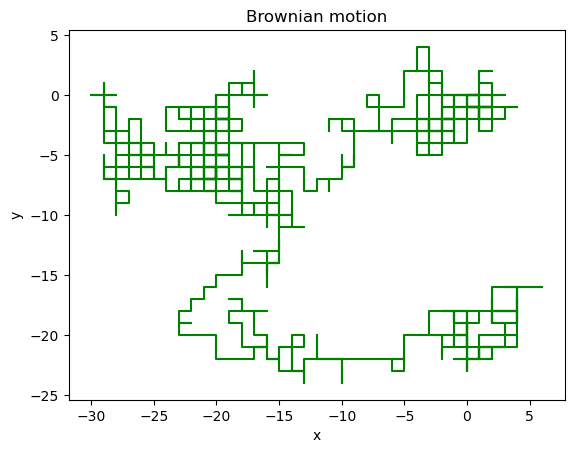

In [4]:
N = 1000
x = 0
y = 0

dirs = [ [1,0], [-1,0], [0,1], [0,-1] ]

points_x = [x]
points_y = [y]

for i in range(N):
    direction = np.random.randint(4)
    x += dirs[direction][0]
    y += dirs[direction][1]
    points_x.append(x)
    points_y.append(y)
    
plt.title("Brownian motion")
plt.plot(points_x, points_y, color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Example 2: Computing integral as the average

An integral

$$
I = \int_a^b f(x) dx
$$

corresponds to the mean value $\langle f \rangle$ over $(a,b)$

$$
\langle f \rangle = \frac{\int_a^b f(x) dx}{b - a} = \frac{I}{b-a},
$$

so that

$$
I = (b-a) \langle f \rangle
$$

The integral can therefore be estimated by evaluating $\langle f \rangle$ as the average value of $f(x)$ obtained through random sampling of the variable $x$ uniformly over the interval $(a,b)$:

$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i).
$$

The error estimate comes from the law of averages and involves the estimate of $\langle f^2 \rangle$

$$
\delta I = (b-a) \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}}
$$

In [8]:
# Compute integral \int_a^b f(x) dx as an average of f(x) over the interval (a,b)
# Returns the value of the integral and the error estimate
def intMC(f, N, a, b):
    total = 0
    total_sq = 0
    for i in range(N):
        x = a + (b-a)*np.random.rand() #from b to a)
        fval = f(x)
        total += fval
        total_sq += fval * fval
    f_av = total / N
    fsq_av = total_sq / N 
    return (b-a) * f_av, (b-a) * np.sqrt((fsq_av - f_av*f_av)/N) #Integral, error
        
def f(x):
    return np.sin(x)

#integrate sin(x) from 0 to pi
N = 1000000
I, err = intMC(f, N, 0, np.pi)
print("I = ",I," +- ",err)

#The integral should equal 2 -> cos0 - cos(pi) = 2

I =  2.0010018103378755  +-  0.000965960317303071


### Integrals in multiple dimensions

Monte Carlo methods really shine when it comes to numerical evaluation of integrals in multiple dimensions.
Consider the following $D$-dimensional integral

$$
I = \int_{a_1}^{b_1} d x_1 \ldots \int_{a_D}^{b_D} d x_D f(x_1,\ldots,x_D).
$$

Computing it numerically using, for instance, the rectangle rule would involves the evaluation of multi-dimensional sum

$$
I \approx \sum_{k_1 = 1}^{N_1} \ldots \sum_{k_D = 1}^{N_D} f(x_{k_1},\ldots,x_{k_D}) \prod_{d=1}^D h_d,
$$

where $h_d = (b_d - a_d)/N_d$ and $x_{k_d} = a_d + h_d (k_d - 1/2)$.

The total number of integrand evalutions is $N_{\rm tot} = \prod_{d=1}^D N_D$, e.g. if we use the same number $N$ of points in each dimension, it scales exponentially with $D$,

$$
N_{\rm tot} = N^D,
$$

We can only make $N$ so large when we go to higher dimensions without calculation becoming unfeasible.
As a result, calculating the integral for $D \gtrsim 4$ even with moderate accuracy becomes challenging.

Let us consider the following integral as an example
$$
I = \int_0^{\pi/2} d x_1 \ldots \int_{0}^{\pi/2} d x_D \, \sin(x_1 + x_2 + \ldots + x_D).
$$

We can evaluate this integral analytically through an iterative procedure for any finite $D$.
The first few results are

| D | I = |
| -------- | -------- |
| 1 | 1  |
| 2 | 2  |
| 3 | 2  |
| 4 | 0  |
| 5 | -4  |
| 6 | -8  |


### Monte Carlo Approach  

Monte Carlo techniques, on the other hand, are not plagued by the curse of dimensionality.
The integral can be approximated by computing the mean value of the integrand in $D$-dimensional space
$$
I = \langle f(x_1,\ldots,x_D) \rangle \prod_{k=1}^D (b_k-a_k).
$$
Here $x_1,\ldots,x_D$ are independent random variables distributed uniformly in intervals $x_k \in [a_k,b_k]$.
Adding one more dimension thus only entails sampling one more number for each sample.
Thus the complexity of the method is linear in $D$ as opposed to the exponential complexity of other methods.

Error estimate
$$
\delta I = \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}} \, \prod_{k=1}^D (b_k-a_k),
$$
scales with $1/\sqrt{N}$ as before.

In [10]:
########## 
#practice on Python list comprehension
##########
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = []
for x in fruits:
    if "a" in x:
        newlist.append(x)

newlist = [x for x in fruits if "b" in x]
print (newlist)
##########

['banana']


In [11]:
# Evaluating a multi-dimensional integral
# by sampling uniformly distributed numbers
# and calculating the average of the integrand
def intMC_multi(f, nMC, a, b):
    dim = len(a)
    total = 0
    total_sq = 0
    for iMC in range(nMC):
        #one line using list comprehension
        x = [a[idim] + (b[idim]-a[idim]) * np.random.rand() for idim in range(dim)]
        fval = f(x)
        total += fval
        total_sq += fval * fval
        
    f_av = total / nMC
    fsq_av = total_sq / nMC
    
    vol = 1.
    for idim in range(dim):
        vol *= b[idim] - a[idim]
        
    return vol * f_av , np.sqrt((fsq_av - f_av*f_av)/N) * vol

In [12]:
%%time #will show CPU time

def f(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    return np.sin(xsum)

Ndimmax = 10
NMC = 1000000
for Ndim in range(1,Ndimmax + 1):
    #list comprehension
    a = [0. for i in range(Ndim)]
    b = [np.pi/2 for i in range(Ndim)]
    I, Ierr = intMC_multi(f, NMC, a, b)
    print("D =",Ndim, " I =",I,"+-",Ierr)

D = 1  I = 0.9995013933587561 +- 0.00048379692023440874
D = 2  I = 2.000251104709607 +- 0.000526984771775469
D = 3  I = 2.000933749102741 +- 0.0018732962698006642
D = 4  I = 0.002548943318232597 +- 0.00393664126592628
D = 5  I = -3.9948582202309186 +- 0.0054553967628467115
D = 6  I = -7.998706302745444 +- 0.007504150215205678
D = 7  I = -8.019268763811748 +- 0.014647283125891402
D = 8  I = -0.018741337699586576 +- 0.025844703905776645
D = 9  I = 15.977408737214843 +- 0.037958121335609406
D = 10  I = 32.009335452011285 +- 0.05657829866289209
CPU times: user 11.6 s, sys: 17 ms, total: 11.6 s
Wall time: 11.6 s


    aSDFEZXDFGYUIOP-[=\\][POIUG## Inverse transform sampling

The algorithm:
1. Calculate the cumulative distribution

$$
G(x) = \int_{-\infty}^x \rho(\xi) d\xi
$$

2. Find the inverse function $G^{-1}(y)$ as the solution to the equation

$$
G(x) = y
$$

with respect to $x$.
3. Sample uniformly distributed randon variables $\eta$ and calculate $\xi = G^{-1}(\eta)$

Sometimes, evaluating $G(x)$ and/or $G^{-1}(y)$ explicitly is challenging.
In such cases one would resort to numerical integration and/or non-linear equation solvers.

## Example 3: radioactive decay

Recall the radioactive decay process. The time of decay is distributed in accordance with
$$
\rho(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}}.
$$

The cumulative distibution function reads
$$
F(x) = \int_0^{x} \frac{1}{\tau} e^{-\frac{t}{\tau}} dt = 1 - e^{-\frac{x}{\tau}}.
$$
To apply inverse transform sampling we have to invert $F(x)$ by solving the equation
$$
1 - e^{-\frac{t}{\tau}} = \eta.
$$
This can be done straightforwardly to give
$$
t(\eta) = -\tau \ln(1-\eta).
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Radioactive decay sampler
def sample_tdecay(tau):
    eta = ???
    return ???
 
tau = 3.053 # Half-time in minutes
N = 10000   # Number of samples

#can use a one-line code to compute the t(eta) trajectory
#alternatively, you can use a loop
t_array = ???
    
# Show a histogram
plt.xlabel("t [minutes]")
plt.ylabel("Counts")
plt.hist(???, bins = 40, range=(0,20), density=True, label = 'Sample')
# Show true distribution
x_true=[x for x in np.arange(0,20)]
pho_true=???
plt.plot(x_true, pho_true, color='r', label='${\\rho(t)}$')
plt.legend()
plt.show() 

SyntaxError: invalid syntax (2129110025.py, line 6)